## Reg-Plot and Polyfit
- Polyfit works for single feature only although it works for multi-degree terms
- Reg Plot simply returns a best-fit line through the data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
! pip install pandas

In [6]:
! pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.5 MB/s eta 0:00:00


In [8]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# So, this data is having 3 features and the final sales

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
# The SD is pretty decent wrt mean so will not Scale the features

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
# There is some correlation between the features as well that cant be ignored, and obv there is a correlation bw features and sales

In [ ]:
# This part of the notebook is for polyfit and reg-plot so we will simply run both of them 

In [13]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [14]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [15]:
df.corr()

,TV,radio,newspaper,sales,total_spend
TV,1.000000,0.054809,0.056648,0.782224,0.945330
radio,0.054809,1.000000,0.354104,0.576223,0.293211
newspaper,0.056648,0.354104,1.000000,0.228299,0.343059
sales,0.782224,0.576223,0.228299,1.000000,0.867712
total_spend,0.945330,0.293211,0.343059,0.867712,1.000000


In [16]:
# Now we can see more corr.

<Axes: xlabel='total_spend', ylabel='sales'>

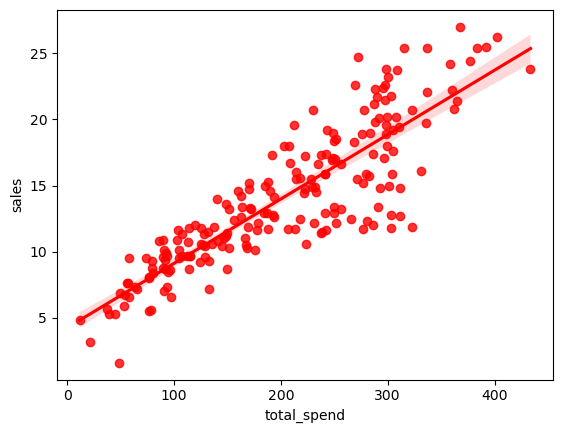

In [23]:
# Simple run the reg-plot now.
sns.regplot(x = 'total_spend' , y = 'sales', data = df, color = 'red')
# help(sns.regplot)

In [28]:
# help(np.polyfit)
arr = np.polyfit(df['total_spend'], df['sales'], deg = 3)
for i in arr:
    print(i)
# The output is  x^3 + x^2 + x + n0

3.0761503304797196e-07
-0.0001893924493476218
0.08208863023067492
2.7049505259500535


In [38]:
# df['poly_model'] = None
# for i in range(len(arr)):
#     df['poly_model'] += (df['total_spend']**(len(arr)-i-1))*arr[i]

del df['poly_mode']
del df['poly_model']

In [39]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [46]:
# df['model'] = arr[0]*(df['total_spend']**3) +  arr[1]*(df['total_spend']**2) +  arr[2]*(df['total_spend']) +  arr[3]  

In [47]:
df.head()

,TV,radio,newspaper,sales,total_spend,model
0,230.1,37.8,69.2,22.1,337.1,30.377028
1,44.5,39.3,45.1,10.4,128.9,13.286175
2,17.2,45.9,69.3,9.3,132.4,13.573485
3,151.5,41.3,58.5,18.5,251.3,23.333823
4,180.8,10.8,58.4,12.9,250.0,23.227108


<Axes: xlabel='total_spend', ylabel='sales'>

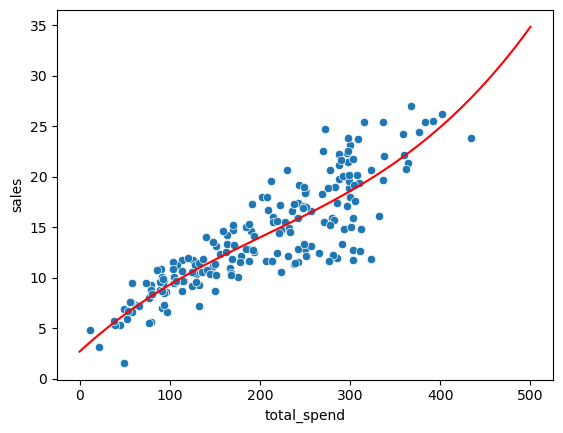

In [55]:
potential_spend = np.linspace(0,500,100)
costi= arr[0]*(potential_spend**3) +  arr[1]*(potential_spend**2) +  arr[2]*(potential_spend) +  arr[3]  
plt.plot(potential_spend, costi, color = 'r')
sns.scatterplot(x = 'total_spend',y = 'sales', data = df)